### Support Vector Machine

In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:
# generate data
# list of points 
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.concatenate((X0.T, X1.T), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)

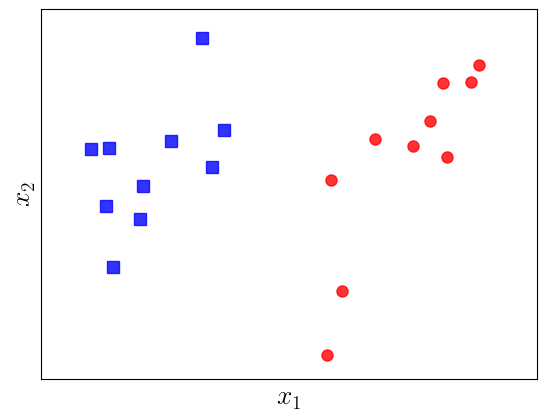

In [3]:
# plot points
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
# axis limits
plt.ylim(0, 3)
plt.xlim(2, 4)


# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# pdf.savefig()
plt.show()

In [4]:
from cvxopt import matrix, solvers
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[8.54018321e-01 2.89132533e-10 1.37095535e+00 6.36030818e-10
  4.04317408e-10 8.82390106e-10 6.35001881e-10 5.49567576e-10
  8.33359230e-10 1.20982928e-10 6.86678649e-10 1.25039745e-10
  2.22497367e+00 4.05417905e-09 1.26763684e-10 1.99008949e-10
  2.13742578e-10 1.51537487e-10 3.75329509e-10 3.56161975e-10]]


In [5]:
epsilon = 1e-6 # just a small number, greater than 1e-9
S = np.where(l > epsilon)[0]

VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))

print('w = ', w.T)
print('b = ', b)

w =  [[-2.00984381  0.64068336]]
b =  4.668560633868079


In [7]:
pip install pdfpages

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for pdfpages: filename=pdfpages-0.1.0-py3-none-any.whl size=3401 sha256=19f770b4092937e582ce46cbb7f3b6d303928fb437785afc091384c1a721217d
  Stored in directory: /Users/tramho/Library/Caches/pip/wheels/5b/92/ba/104b087ba614625d9e65f221b77b4cdcaeff5eb9d7e9ddf11a
Successfully built pdfpages
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^
Note: you may need to restart the kernel to use updated packages.


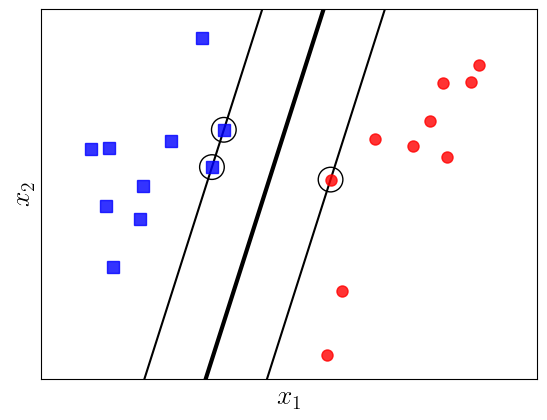

In [15]:
# draw
# plot points
fig, ax = plt.subplots()

x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # just a big number 
y = y.reshape((2*N,))
clf.fit(X.T, y ) # each sample is one row

w = clf.coef_
b = clf.intercept_
print('w = ', w)
print('b = ', b)

w =  [[-2.00971102  0.64194082]]
b =  [4.66595309]
